# RelationShip Between Assets
**KAAN Koşti 252548**

<img style="float: left;" src="https://i.sozcu.com.tr/wp-content/uploads/2021/06/08/iecrop/kripto_16_9_1623131954.jpg" width="100%"> 



# Introduction
Unlike paper currency, gold has maintained its value throughout the ages. People see gold as a way to pass on and preserve their wealth from one generation to the next.
Although the U.S. dollar is one of the world's most important reserve currencies, when the value of the dollar falls against other currencies other assets price **generally raises**.(Gold,coins,etc)money flow has to continue somehow.In project I will analyze **relationship between assets.**



1. **Is there any connection between assets** ? 
2. **Can we minimize the number of assets for investing?**
3. **Can we predict the next day prices ?**


# The steps I will use by order

1. **Corellation map for finding the relations**
2. **Observation the graphs in order to see the relations**
3. **Visualization and modelings with selected data (preferably high correlation score)** 
4. **Predicting the selected assets price by rearrenge the data by shifting it selected day** 
5. **Observation of predicting price vs actual price** 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Importing My Dataset


In [2]:
df = pd.read_csv('finaldatabase.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Date,SPX,GLD,USO,SLV,EUR/USD,Bitcoin,Ethereum
0,11/6/2013,1770.489990,127.199997,34.189999,21.000000,1.347309,264.470001,0.708448
1,11/7/2013,1747.150024,126.160004,33.970001,20.830000,1.351808,270.385986,1.067860
2,11/8/2013,1770.609985,124.279999,34.009998,20.690001,1.340914,266.376007,1.217440
3,11/11/2013,1771.890015,123.870003,34.259998,20.600000,1.334793,264.079987,1.827670
4,11/12/2013,1767.689941,122.449997,33.639999,20.000000,1.340932,265.679993,1.827870
...,...,...,...,...,...,...,...,...
1006,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789,8504.889648,686.047974
1007,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722,8723.940430,733.495972
1008,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753,8716.790039,730.549011
1009,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118,8510.379883,708.870972


In [3]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD,Bitcoin,Ethereum
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,2168.455064,118.583960,18.132874,16.452685,1.180440,3018.871429,188.823200
std,267.754635,6.768537,10.009545,1.801285,0.103566,4058.265819,289.790139
min,1741.890015,100.500000,7.960000,13.060000,1.039047,210.494995,0.434829
25%,1982.535034,114.769997,10.735000,15.345000,1.100601,447.793503,8.494000
50%,2090.570068,119.459999,12.780000,16.059999,1.135963,834.281006,12.854300
75%,2360.644898,124.220001,21.320000,17.485000,1.241211,4168.899902,299.561493
max,2872.870117,133.100006,39.290001,21.180000,1.393088,19497.400391,1396.420044


# Relationship Beetween Assets 
* As we can see the below **gold and silver** has a nearly perfect **positive correlation** which means if gold is increasing silver will also.<br>
* Lets also consider **SPX** index it has **negative correlation** with **EURO and OIL** <br>
* So we can minimize the number of assets to make better investment or prediction.


<AxesSubplot:>

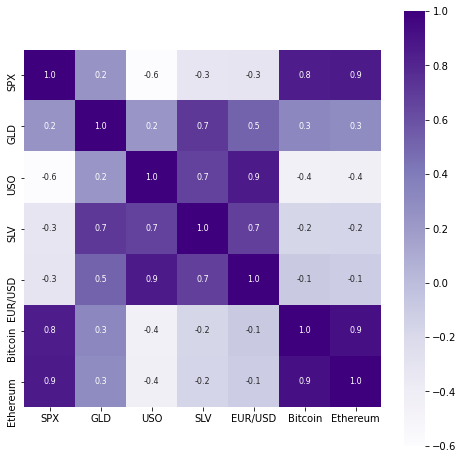

In [4]:
correlation = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Purples')

In [5]:
print (correlation['GLD'].sort_values(ascending=False), '\n')

GLD         1.000000
SLV         0.718591
EUR/USD     0.516584
Bitcoin     0.321578
Ethereum    0.296926
SPX         0.244617
USO         0.237091
Name: GLD, dtype: float64 



# Gold and Silver price
**(Positive Correlation)**

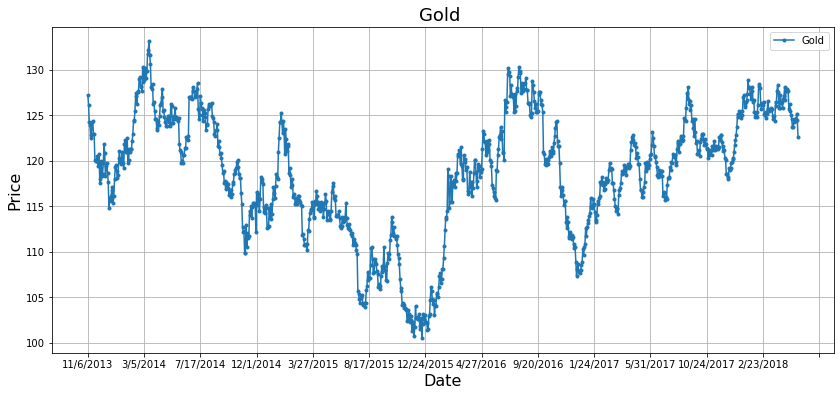

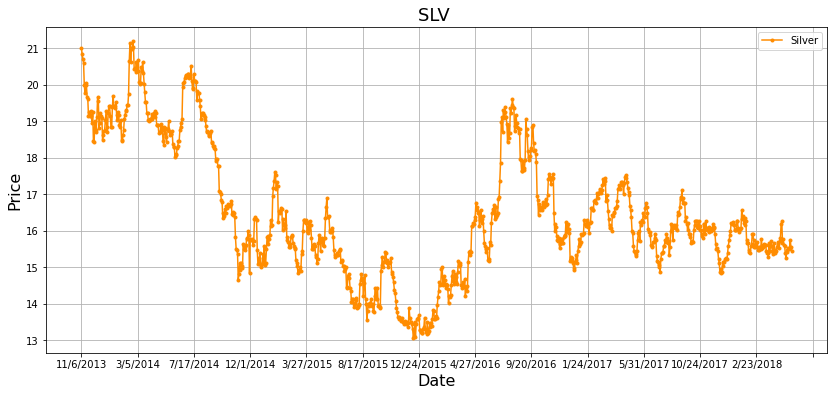

In [6]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df.Date, df.GLD, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.grid()
plt.title('Gold ',fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['Gold'])
plt.show()


fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df.Date, df.SLV, marker='.',color='darkorange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.grid()
plt.title('SLV ',fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['Silver'])
plt.show()


# BTC AND ETH PRICE


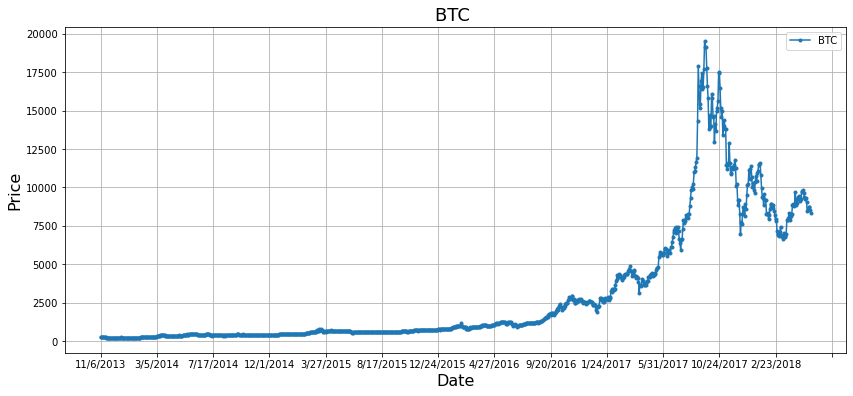

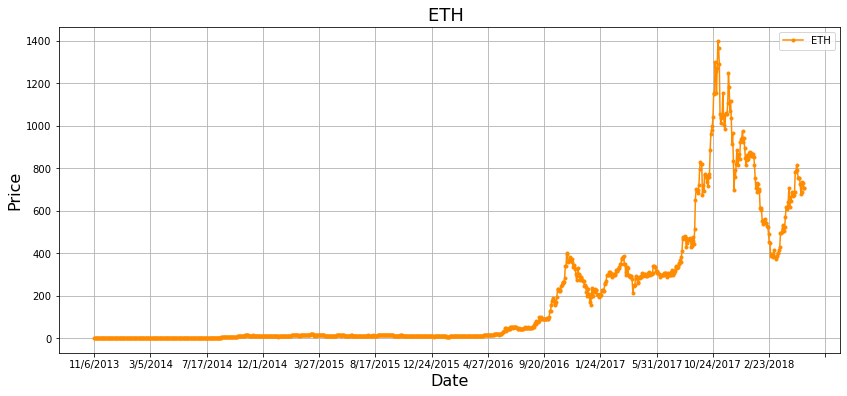

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df.Date, df.Bitcoin, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.grid()
plt.title('BTC ',fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['BTC'])
plt.show()


fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df.Date, df.Ethereum, marker='.',color='darkorange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.grid()
plt.title('ETH ',fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['ETH'])
plt.show()

# SPX AND USO
**(Negative Correlation )**

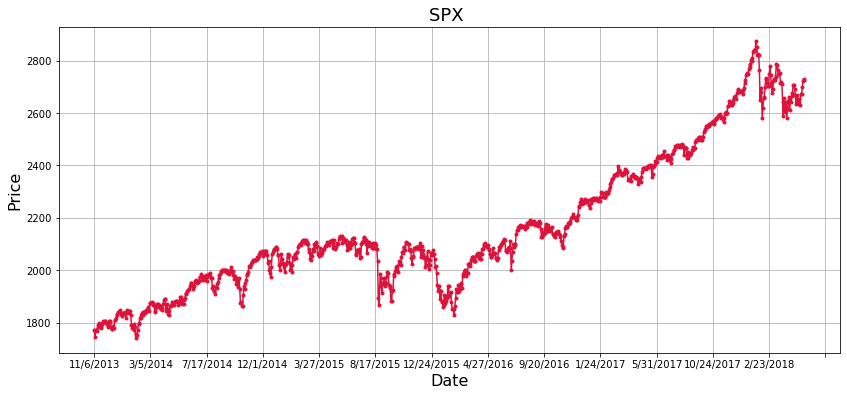

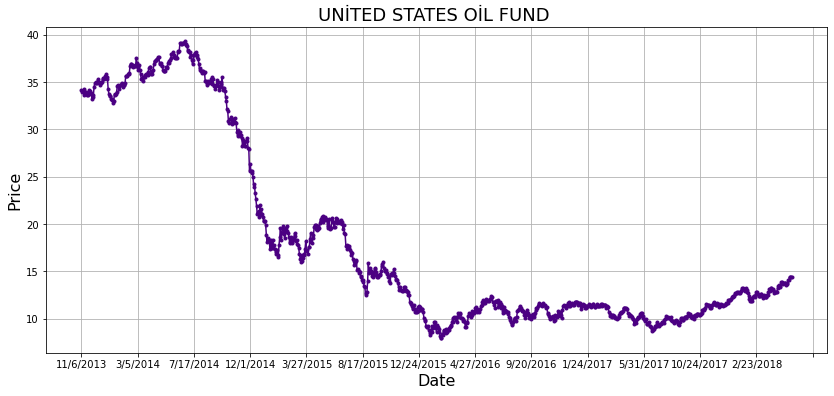

In [8]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df.Date, df.SPX, marker='.',color='crimson')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.grid()
plt.title('SPX ',fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()




fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df.Date, df.USO, marker='.',color='indigo')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 

plt.grid()
plt.title('UNİTED STATES OİL FUND ',fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()




# Visualization 
**Since one of the best correlation is BTC and ETH I used BTC and ETH prices for following modelings**


In [9]:
x = df['Bitcoin'].values
y = df['Ethereum'].values


#SVR
model_svr = SVR()
model_svr.fit(x.reshape(-1,1), y)
x_plot = np.linspace(start=x.min(), stop=x.max(), num=300)
y_svr_pred_plot = model_svr.predict(x_plot.reshape(-1,1))

#linear Model
model_lin = LinearRegression()
model_lin.fit(x.reshape(-1,1), y)
y_lin_pred_plot = model_lin.predict(x_plot.reshape(-1,1))


#GlM
preX = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
Xtransformed = preX.fit_transform(x.reshape(-1,1))
model_GLM = LinearRegression()
model_GLM.fit(Xtransformed, y)
Xtransformed = preX.fit_transform(x_plot.reshape(-1,1))
y_GLM_pred_plot = model_GLM.predict(Xtransformed)


In [10]:
print(f'Model params: {model_lin.coef_}, {model_lin.intercept_}')

Model params: [0.06586322], -10.009403704909232


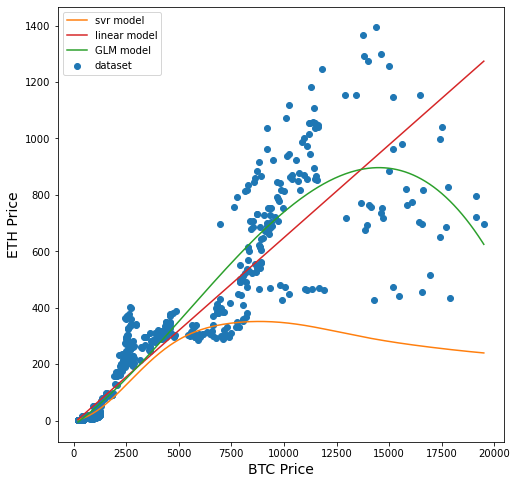

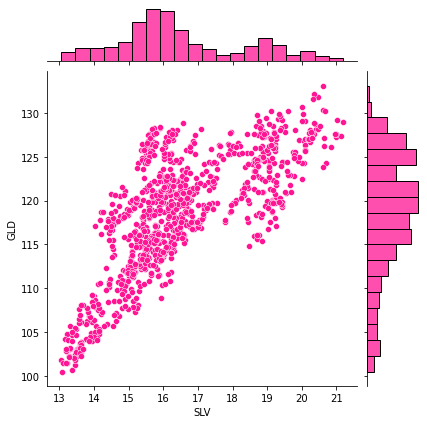

In [11]:

plt.figure(figsize=(8,8))
plt.scatter(x, y, label='dataset')
plt.plot(x_plot, y_svr_pred_plot, label='svr model', color='tab:orange')
plt.plot(x_plot, y_lin_pred_plot, label='linear model', color='tab:RED')
plt.plot(x_plot, y_GLM_pred_plot, label='GLM model', color='tab:GREEN')
plt.xlabel('BTC Price', fontsize=14)
plt.ylabel('ETH Price', fontsize=14)
plt.legend()
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'deeppink')

# Predict the Future Price of BTC


In [12]:
#Create a variable for predicting 'n' days out into the future
projection = 14
#Creating a new column called prediction BTC 
df['BTCPREDICT'] = df[['Bitcoin']].shift(-projection)
df

,Date,SPX,GLD,USO,SLV,EUR/USD,Bitcoin,Ethereum,BTCPREDICT
0,11/6/2013,1770.489990,127.199997,34.189999,21.000000,1.347309,264.470001,0.708448,210.494995
1,11/7/2013,1747.150024,126.160004,33.970001,20.830000,1.351808,270.385986,1.067860,221.608994
2,11/8/2013,1770.609985,124.279999,34.009998,20.690001,1.340914,266.376007,1.217440,225.830994
3,11/11/2013,1771.890015,123.870003,34.259998,20.600000,1.334793,264.079987,1.827670,224.768997
4,11/12/2013,1767.689941,122.449997,33.639999,20.000000,1.340932,265.679993,1.827870,231.395996
...,...,...,...,...,...,...,...,...,...
1006,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789,8504.889648,686.047974,NaN
1007,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722,8723.940430,733.495972,NaN
1008,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753,8716.790039,730.549011,NaN
1009,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118,8510.379883,708.870972,NaN


# The idea 
* I created a new column and shifted 14 days.<br>
* The new column is future price for BTC after 14 days.<br>
* If we go down the last 14 days we have NaN values for now thats because we dont know what the future price is going to be because it wasnt in this data set.
* **I will try to predict this NaN values**

# We gonna use last 14 days 
We gonna try to predict 14 days later BTC prices


In [13]:
#Creating independent data set (X)
idata = np.array(df[['Bitcoin']])
#Removing the last 14 days 
idata = idata[:-projection]
print(x)

[ 264.47000122  270.38598633  266.37600708 ... 8716.79003906 8510.37988281
 8368.83007812]


In [14]:
#Create the dependent data set (y)
ydata = df['BTCPREDICT'].values
ydata = ydata[:-projection]

In [15]:
#Split the data into 85% training and %15 testing data sets
idata_train, idata_test, ydata_train, ydata_test =train_test_split(idata,ydata,test_size=.15)

In [16]:
#Create and train the model
linReg = LinearRegression()
#Train the model 
linReg.fit(idata_train,ydata_train)

LinearRegression()

In [17]:
#Test the model using score 
linReg_confidence = linReg.score(idata_test,ydata_test)
print('Linear reggression Confidence: ',linReg_confidence)

Linear reggression Confidence:  0.9479111544485478


In [18]:
#Create a variable and set it equal to the last 14 rows of data from the original data set
x_projection =np.array(df[['Bitcoin']])[-projection:]
print(x_projection)

[[9743.86035156]
 [9700.75976562]
 [9858.15039062]
 [9654.79980469]
 [9373.00976562]
 [9234.8203125 ]
 [9325.1796875 ]
 [9043.94042969]
 [8441.49023438]
 [8504.88964844]
 [8723.94042969]
 [8716.79003906]
 [8510.37988281]
 [8368.83007812]]


In [19]:
#Print the linear regression models predictions for next 14 days.
linReg_prediction =linReg.predict(x_projection)
print(linReg_prediction)

[9687.98077405 9646.17303682 9798.84255972 9601.59169465 9328.25425272
 9194.20994177 9281.85888954 9009.05570759 8424.67665778 8486.17433781
 8698.65445385 8691.71854693 8491.49988666 8354.19602153]


# Visualization of Future 14 Days BTC Prices

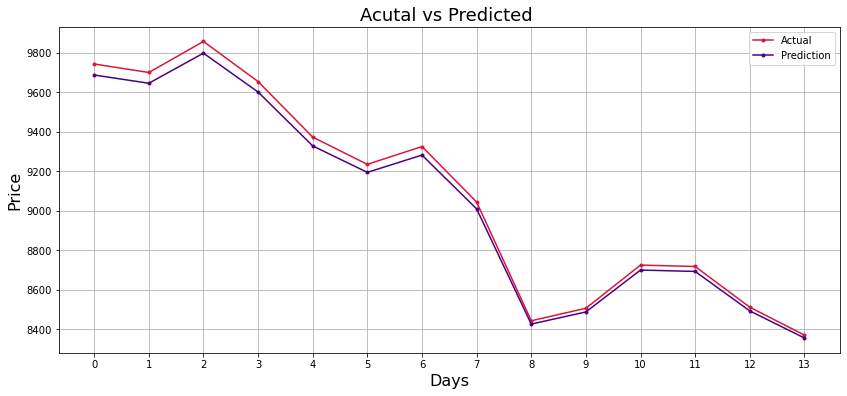

In [20]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot( x_projection, marker='.',color='crimson')
ax.plot( linReg_prediction, marker='.',color='indigo')

ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.grid()
plt.title('Acutal vs Predicted ',fontsize=18)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['Actual','Prediction'])
plt.show()

# Conclusion
>1.There are lots of relations between other assets as we can see from the correlation map.Gold is usually denominated in U.S. dollars. Therefore, there is a relationship between the price of gold and the dollar, in that there can be an effect on gold prices as the value of the dollar rises and falls and all others.


>2.Minimazing the number of assets for investing or predicting  will makes things easier.We can think that SLV-GLD as a one asset.OIL-EURO one Cryptos as one etc..

>3.Try to predict what future price will be for selected assets(BTC in this case).